# 3.6.3 Bungee Dunk

---

<br>

*Modeling and Simulation in Python*

Copyright 2021 Allen Downey, (License: [Creative Commons Attribution-NonCommercial-ShareAlike 4.0 International](https://creativecommons.org/licenses/by-nc-sa/4.0/))

Revised, Mike Augspurger (2021-present)

<br>

---

In simulating the Penny problem using differential equations, we have made it possible to handle much more complex acceleration problems relatively easily.  

<br>

Why is it easier now? Addition! The Second Law of Motion connects a sum of forces to the second derivative of position (acceleration, that is):

<br>

$$\frac{d^2x}{dt^2} = \frac{\Sigma F}{m}$$

<br>

That sigma $\Sigma$ indicates addition, and this is not hard to handle in a simulation.  We can add whatever forces we'd like to our simulation--even if they change with time or position--and then use the differential equation to determine position and velocity for our object.

<br>

We'll test this out by dunking a tea biscuit after plummeting down a couple hundred feet.

## Modeling and Implementing the Bungee Dunk

Let's say you want to set the world record for the highest "bungee dunk", which is a stunt in which a bungee jumper dunks a cookie in a cup of tea at the lowest point of a jump. Apparently, this is something you could try [(The video is worth a look)](https://https://www.youtube.com/watch?v=UBf7WC19lpw).

<br>

<center>
<img src = https://github.com/MAugspurger/ModSimPy_MAugs/raw/main/Images_and_Data/Images/3_6/tea.PNG width = 250>
</center>

<br>

Since the record is 70 m, let's design a jump for 80 m. We'll start with the following modeling assumptions:

-   Initially the bungee cord hangs from a crane with the attachment point 80 m above a cup of tea.

-   Until the cord is fully extended, it applies no force to the jumper.  

-   After the cord is fully extended, it obeys Hooke's Law; that is, it applies a force to the jumper proportional to the extension of the cord beyond its resting length: $F = k\Delta x$

-   The mass of the jumper is 75 kg.

-   The jumper is subject to drag force so that their terminal velocity is 70 m/s; this is roughly the terminal velocity of a skydiver who is oriented vertically.

<br>

Our objective is to choose the length of the cord, `L`, and its spring
constant, `k`, so that the jumper falls all the way to the tea cup, but no farther!

---

<br>

🟨 🟨 Active reading: Multiple choice


In [ ]:
import pandas as pd
import numpy as np
from urllib.request import urlretrieve

location = 'https://github.com/MAugspurger/ModSimPy_MAugs/raw/main/'
folder = 'Support_files/'
name = 'Embedded_Qs.ipynb'
local, _ = urlretrieve(location + folder + name, name)
%run /content/$name

#@title { run: "auto", form-width: "50%", display-mode: "form" }
home = 'https://github.com/MAugspurger/ModSimPy_MAugs/raw/main/Images_and_Data/Embedded_Qs/'
data = display_multC('3_6_2nd_order',home,7)
answer = "" # @param ["", "A", "B", "C", "D", "E"]
check_multC(data,answer)


---

### Parameters and the system

We'll set up our state and system in the same way we did for the penny problem, including calculating the coefficient of drag.   We also make two initial guesses at our independent variables, the length of the rope $L$ and the spring coefficient $k$:


In [ ]:
import pandas as pd
import numpy as np

# Physical parameters
y_attach = 80.0     # m
v_init = 0          # m/s
g = 9.81            # m/s2
mass = 75.0         # kg
area = 0.3          # m2
rho = 1.2           # kg/m3
v_term = 70         # m/s
L = 25.0            # m
k = 40.0            # N/m

# Simulation parameters
dt = 0.01           # s
t_end = 30          # s

In [ ]:
state = pd.Series(dict(y=y_attach, v=v_init))
system = dict(g=g, mass=mass, area = area, y_attach = y_attach,
              rho=rho, C_d = (2.0*mass*g)/(rho*v_term**2*area),
                L=L, k=k, t_end=t_end, dt = dt)
system['C_d']

0.8341836734693877

The coefficient of drag is 0.83, which is a reasonable number given the situation.

### Computing forces

Now we need to calculate the forces on the jumper.  We'll start with `spring_force`, which computes the force of the cord on the jumper.  If the spring is not extended, the spring force is set to 0; if it is extended, the force is calculated using Hooke's Law:

<br>

$$F_{spring} = k \Delta y$$

<br>

where $\Delta y$ is the distance that the spring (or rope) is stretched.



In [ ]:
def spring_force(y, system):
    # Unpack the necessary parameters
    y_attach, L, k = system['y_attach'], system['L'], system['k']

    # Determine if the rope is stretched
    # If so, calculate the force
    distance_fallen = y_attach - y
    if distance_fallen <= L:
        f_spring = 0
    else:
        extension = distance_fallen - L
        f_spring = k * extension

    return f_spring

The spring force is 0 until the cord is fully extended.  Remember that the total height is 80 m, so as long as the jumper's position is $y=55~m$ or above, the cord is not extended.

<br>When it is extended 1 m, the spring force is 40 N in the positive (upward) direction.

In [ ]:
spring_force(55, system)

0

In [ ]:
spring_force(54, system)

40.0

Now we can compute the drag force as a function of velocity.  Notice how we use the NumPy function `sign()` to make sure that the force is always in the direction opposite to the direction of motion. `sign()` returns a value of either 1.0 or -1.0 (depending on the value used as an argument):

In [ ]:
def drag_force(v, system):
    # Unpack the necessary parameters
    rho, C_d, area = system['rho'], system['C_d'], system['area']

    # Calculate the drag force vector
    f_drag = -np.sign(v) * ((1/2) * rho * v**2 * C_d * area)
    return f_drag

We can check the internal validity of this function by making sure that when the acceleration created by drag at the terminal velocity is equal and opposite to the acceleration created by gravity.  Here's the drag force at 70 meters per second.

In [ ]:
v = -70
f_drag = drag_force(v, system)
a_drag = f_drag / system['mass']
a_drag

9.81

It checks out OK!

---

<br>

🟨 🟨 Active reading: Multiple choice


In [ ]:

#@title { run: "auto", form-width: "50%", display-mode: "form" }
home = 'https://github.com/MAugspurger/ModSimPy_MAugs/raw/main/Images_and_Data/Embedded_Qs/'
data = display_multC('3_6_2nd_order',home,8)
answer = "" # @param ["", "A", "B", "C", "D", "E"]
check_multC(data,answer)


---

<br>

🟨 🟨 Active reading: Multiple choice


In [ ]:
#@title { run: "auto", form-width: "50%", display-mode: "form" }
home = 'https://github.com/MAugspurger/ModSimPy_MAugs/raw/main/Images_and_Data/Embedded_Qs/'
data = display_multC('3_6_2nd_order',home,9)
answer = "" # @param ["", "A", "B", "C", "D", "E"]
check_multC(data,answer)


---

### The change function

Now we can sum our forces in the slope function and determine the overall acceleration using the Second Law and addition:

In [ ]:
def change_func(t, state, system):

    y, v = state
    mass, g, dt = system['mass'], system['g'], system['dt']

    a_gravity = -g
    a_drag = drag_force(v, system) / mass
    a_spring = spring_force(y, system) / mass

    dydt = v
    dvdt = a_gravity + a_drag + a_spring

    y = y + dydt*dt
    v = v + dvdt*dt

    return pd.Series(dict(y=y, v=v))

As always, let's test the slope function with the initial parameters.  Just as the jumper jumps from the platform, position should be just under 80 m and the velocity starting at 0 and growing more negative:

In [ ]:
state = change_func(0, state, system)
state

y    79.972532
v    -0.784773
dtype: float64

Finally, we need a `run_simulation`, which will look very similar to what we've used before:

In [ ]:
def run_simulation(system, state, change_func):
    # Define the time steps
    t_array = np.arange(0, system['t_end']+1, system['dt'])
    n = len(t_array)

    # Set up a DataFrame to store the our state variables
    results = pd.DataFrame(index=t_array, columns=state.index,
                        dtype=np.float64)
    results.iloc[0] = state

    for i in range(n-1):
        t = t_array[i]
        state = change_func(t, state, system)
        results.iloc[i+1] = state

    return results

## Analyzing the Bungee Dunk

### Finding the minimum position

Our central aim is to find the $L$ and $k$ values that will allow our jumper to reach 80 m at the bottom of the jump, which would allow her to dunk her tea biscuit.   Let's take a look at the results:

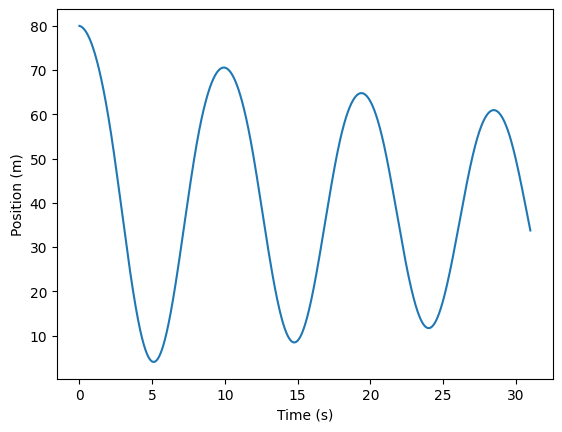

In [ ]:
results = run_simulation(system,state,change_func)
results.y.plot(xlabel='Time (s)',
             ylabel='Position (m)');

That's quite a ride!  After reaching the lowest point, the jumper springs back almost to almost 70 m and oscillates several times.  That looks like more oscillation that we expect from an actual jump, which suggests that there is some dissipation of energy in the real world that is not captured in our model.  To improve the model, that might be a good thing to investigate.

<br>

But since we are primarily interested in the initial descent, the model might be good enough for now.  We can use the built-in function `min()` to find the lowest point:

In [ ]:
min(results.y)

4.050060706551146

At the lowest point, the jumper is still too high.

<br>

Just for funsies, let's plot the velocity as a function of time:

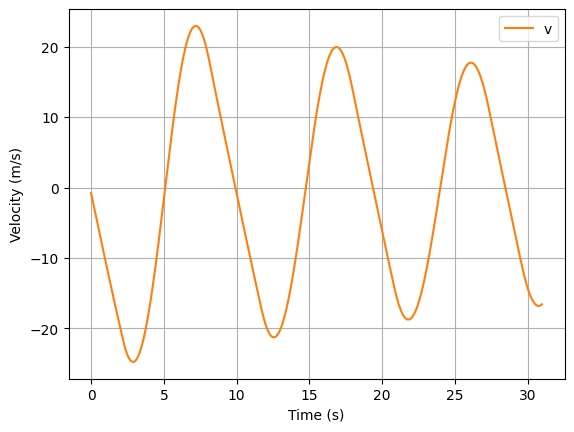

In [ ]:
results.v.plot(color='C1', label='v', xlabel='Time (s)',
                   ylabel='Velocity (m/s)', legend=True, grid=True);

Notice that while the oscillation in this plot is similar to that in the position plot, it is shifted in time: when the jumper reaches the lowest elevation at about 5.0 s, the velocity is at 0.0.


---

<br>

🟨 🟨 Active reading: Multiple choice


In [ ]:
#@title { run: "auto", form-width: "50%", display-mode: "form" }
home = 'https://github.com/MAugspurger/ModSimPy_MAugs/raw/main/Images_and_Data/Embedded_Qs/'
data = display_multC('3_6_2nd_order',home,10)
answer = "" # @param ["", "A", "B", "C", "D", "E"]
check_multC(data,answer)


---

### Solving for the ideal rope length

We could find the proper $L$ by the "guess-and-check" method, but we have tools that are more efficient and accurate than that.  Let's use `root_scalar()` to find the optimal length $L$.

<br>

Remember that  `root_scalar()` finds the roots of a mathematical function.  A function always has an independent variable and a dependent variable.   In this case our function,  $\Delta y = f(L)$, has $L$ as the independent variable and $\Delta y$ as the dependent variable, where $\Delta y$ is the distance between the jumper's lowest point and the tea cup (that is, the "error" between the result and the ideal results).

<br>  

We just need to put this mathematical function in the form of a Python function:

In [ ]:
def error_func(L, system):
    system['L'] = L
    results = run_simulation(system,state,change_func)
    y_final = min(results.y)
    y_ideal = 0
    delta_y = y_final - y_ideal
    return delta_y

`error_func` takes in the independent variable as an argument, and spits out the dependent variable.  Let's test the error function with the value of $L$ that we used above.  We should get the same minimum value (~4.1 m):

In [ ]:
# Test your error function
# Enter '25' as the 'L' value and make sure it gives you a value
# around 4-5 m

error_func(25.0,system)

4.050060706551146

Now we can pull `root_func` into `root_scalar`, and it should find the value of $L$ that will optimize the length of our cord.   Since `root_scalar` needs a 'bracket' that gives a negative and a positive result, we'll give it a two lengths for $L$, one that we know is too short and one that is too long:

In [ ]:
import scipy.optimize as spo
res1 = spo.root_scalar(root_func, system, bracket=[25,80])
res1.root

27.86769283668814

And now we can see that our cord has the ideal length to dip our biscuit into a cup of piping hot British tea:

-1.866340198705685e-13


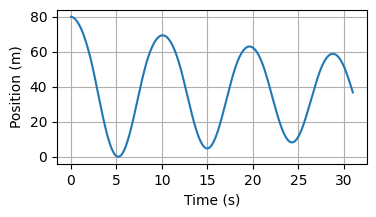

In [ ]:
system['L'] = res1.root
results_opt = run_simulation(system,state,change_func)
print(min(results_opt.y))
results_opt.y.plot(xlabel='Time (s)', grid=True,
             ylabel='Position (m)', figsize = [4,2]);

<center>
<img src = https://github.com/MAugspurger/ModSimPy_MAugs/raw/main/Images_and_Data/Images/3_6/cookie.PNG width = 300>
</center>

## Exercises

---

<br>

🟨 🟨

### Exercise 1

Below this exercise is a copy of the function `spring_force(y,system)` so you can easily look at it.  Answer the following questions about the function, remembering that it gets called at every time step:

✅ A. What is the variable `y`?

✅ ✅ Answer here.

✅ B. What does `distance_fallen` represent in the physical system?

✅ ✅ Answer here

✅ C. In what circumstances is 'f_spring' set to 0?

✅ ✅ Answer here

✅ D. What does the variable `extension` represent in the physical system?

✅ ✅ Answer here

✅ E. What does this function return?  

✅ ✅ Answer here

In [ ]:
def spring_force(y, system):
    y_attach, L, k = system['y_attach'], system['L'], system['k']

    distance_fallen = y_attach - y

    if distance_fallen <= L:
        f_spring = 0
    else:
        extension = distance_fallen - L
        f_spring = k * extension

    return f_spring